# Quantum Computing and Classical Computing

***

This notebook provides a clear and concise comparison between [Quantum Computing](https://en.wikipedia.org/wiki/Quantum_computing) and [Classical Computing](https://en.wikipedia.org/wiki/Computing).

An explanation of [Deutsch's algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html) with the accompanying code will also be provided. This code will be simulated using [qiskit](https://qiskit.org/).

## What is Quantum Computing?

Quantum computing is a type of computation that harnesses the collective properties of quantum states, such as superposition, interference and entanglement, to perform calculations.

Quantum computers are machines that perform quantum computations. These computers use quantum bits, better known as qubits as their basic unit of memory.

Below is an example of a quantum computer, you can see straight away there is a big difference with how this looks compared to what you may have at home.

<img src="./images/quantum-computer.jpg" width="350"/>

## How does it work?

Quantum computers work by substituting the binary "bits" of classical computing with "qubits". Qubits are made using physical systems, such as the spin of an electron or the orientation of a photon. 

These systems can be in many different arrangements all at once, a property known as quantum [superposition](https://en.wikipedia.org/wiki/Quantum_superposition). 

These qubits can also be linked together using a phenomenon called quantum [entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement) no matter how far apart they are in space, their states remain linked. That means they share a common, unified quantum state. 

The result is that a series of qubits can represent different things simultaneously. Using these qubits, a quantum computer will perform calculations based on the probability of an object's state before it is measured, this means they have the potential to process exponentially more data compared to classical computers.

## Quantum Computing vs Classical Computing

I think it is safe to say most of us know what a classical computer is. We have used and seen one thousands of times, so I will compare quantum computing to classical rather than explaining classical computing, but if you would like more information on classical computing you can go [here](https://whatis.techtarget.com/definition/classical-computing#:~:text=Classical%20computing%20is%20another%20name,or%20a%201%20(on).&text=A%20classical%20bit%20is%20either,a%20condition%20known%20as%20superposition). 

Quantum computers process information in a fundamentally different way to classical computers. Instead of relying on transistors, which can only represent either the “1” or the “0” of binary information at a single time, quantum computers use qubits, which can represent both 0 and 1 simultaneously.

A quantum computer’s power grows exponentially in relation to the number of qubits linked together. This differs from a classical computer, which sees its power increase in direct proportion to the number of transistors. This is one reason why quantum computers could eventually handle some types of calculations much better than classical computers.

Quantum computers are difficult to build,have high error rates and need to  be kept ultracold. Classical computers on the other hand have low error rates and can operate at room temperature.

Although quantum computers are well suited for tasks like optimization problems, data analysis and simulations, most everyday processing is best handled by classical computers.

# Deutsch's Algorithm

https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

***

Deutsch's algorithm was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for specific problems.
<br><br>
This algorithm is a deterministic quantum algorithm that was first proposed by David Deutsch and Richard Jozsa in 1992.

## Deutsch's Problem

In Deutsch's problem, we are given an oracle which is a black box quantum computer that implements some function <b>f</b>. The function takes n-digit binary values as input and produces either a 0 or 1 as output for each value. 
<br><br>
The problem is that the function could be constant meaning all output values are the same (0 or 1) or the function could be balanced meaning roughy half of the inputs should return 0 and the other half should return 1. The task is then to determine if <b>f</b> is constant or balanced by using the oracle.

## Preliminaries

***

### Qubits

<i>By default, all qubits are initialized to the $|0\rangle$ state</i>.

$|0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$|1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

<i>Psi represents all the possibilities that a quantum object, like an electron can take across time and space</i>.
<br>
<i>$\alpha$ and $\beta$ are both complex numbers.

$|\psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \alpha |0 \rangle + \beta |1 \rangle$

$\alpha = a + bi \qquad \beta = c + di \qquad a,b,c,d \in \mathbb{R}$

$\alpha^2 + \beta^2 = 1$

### Gates

<i>Gates are always 2x2 Matrices for a single qubit</i>

#### Hadamard Gate

<i>The Hadamard gate is defined as follows: it turns $|0\rangle$ into $(|0\rangle+|1\rangle)/2$ and $|1\rangle$ into $(|0\rangle+|1\rangle)/2$.</i><br>
$ H = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

<i>Apple the Hadamard Gate to qubit 0</i><br>
$ H | 0 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}
= | + \rangle$

<i>Apply the Hadamard gate to qubit 1</i><br>
$ H | 1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix}
= | - \rangle$

<i>$H^*$ is a conjugate transpose. This means we create a new matrix where the rows from the last matrix are now columns and the columns from the last matrix are now rows (transposing), which allows us to validate a gate</i><br>
$H^* = H^{-1}$

$(a+bi)^* = a - bi$

#### Identity Gate

<i>The Identity gate is a single-qubit operation that leaves the basis states $|0\rangle$ and $|1\rangle$ unchanged.</i><br>
$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

### Measurement

<i>Measure the states</i><br>
$ |\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \Leftrightarrow \langle \psi | 
= \begin{bmatrix} \alpha^* & \beta^* \end{bmatrix}$

#### Probability of Measuring $|0\rangle$ when in $|+\rangle$

<i>If we are in the $|+\rangle$ state, the probability it is 0 is $\frac{1}{2}$<br>
$|\langle 0 | + \rangle |^2 = |\langle 0 || + \rangle |^2 = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} |^2 = |(1)(\frac{1}{\sqrt{2}}) + (0)(\frac{1}{\sqrt{2}}) |^2 = (\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

$|a+bi| = \sqrt{(a+bi)(a-bi)} = \sqrt{a^2 + b^2}$

#### Probability of Measuring $|1\rangle$ when in $|-\rangle$

<i>If we are in the $|-\rangle$ state, the probability it is 1 is $\frac{1}{2}$</i><br>
$|\langle 1 | - \rangle |^2 = |\langle 1 || - \rangle |^2 = \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} |^2 = |(0)(\frac{1}{\sqrt{2}}) + (1)(-\frac{1}{\sqrt{2}}) |^2 = (-\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

#### Probability of Measuring $|1\rangle$ when in $|0\rangle$

<i>The probability of meaning one when in the other state is 0</i><br>
$|\langle 1 | 0 \rangle |^2 == \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} |^2 = |(0)(1) + (1)(0) |^2 = 0$

### Multiple Qubits

<i>Multiple qubits are represented using the [Kroneker product](https://en.wikipedia.org/wiki/Kronecker_product).

First qubit: $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

Second qubit: $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

<i>Multply the first and second matrix to get the combined result</i><br>
Together: $|01\rangle = \begin{bmatrix} 1 \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ 0 \begin{bmatrix} 0 \\ 1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} (1)(0) \\ (1)(1) \\ (0)(1) \\ (0)(0) \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$

#### CNOT Gate

<i>The CNOT gate is two-qubit operation, where the first qubit is usually referred to as the control qubit and the second qubit as the target qubit.</i><br>
$CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$

<i>If the qubits are $|01\rangle$, nothing happens.</i><br>
$CNOT \times |01\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = |01\rangle$

<i>If the qubits are $|10\rangle$, the bottom two numbers get swapped around in thefinal 1x4 matrix.</i><br>
$CNOT \times |10\rangle = |0\rangle \bigotimes |1\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = |11\rangle$

#### H followed by CNOT

<i>This is just an example of the Kroneker product of two matrices, in this case it is two Hadamard gates.</i><br>
$H \bigotimes H = \begin{bmatrix} \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} &\frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} \\ \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} & -\frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} \end{bmatrix} = \begin{bmatrix} (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} \\ (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & -(\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & -(\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} \\ (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & -(\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & -(\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} \\ (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & -(\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & -(\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} & (\frac{1}{\sqrt{2}})\frac{1}{\sqrt{2}} \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{bmatrix}$

<i>Add a CNOT gate to the result of the previous equation</i><br>
$CNOT \times (H \bigotimes H) \times |10\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \\ -\frac{1}{2} \\ -\frac{1}{2} \end{bmatrix} $

$ (\frac{1}{2})^2 + (\frac{1}{2})^2 + (-\frac{1}{2})^2 + (-\frac{1}{2})^2 = \frac{1}{4} + \frac{1}{4} + \frac{1}{4} + \frac{1}{4} = 1 $

### Function Oracles

<i>An oracle $O$ is a "black box" operation that is used as input to another algorithm.</i><br>

#### Balanced $f(0) = 0$ and $f(1) = 1$

<i>x is untouched. If y and f(x) are both zero, then it returns 0 and if they are both one, it returns 0</i><br>
$|01\rangle = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix}$

$ |xy\rangle \rightarrow |x, y \oplus f(x) \rangle$

$ \begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix} \rightarrow \begin{matrix} |00\rangle \\ |01\rangle \\ |11\rangle \\ |10\rangle \end{matrix}$

#### Constant $f(0) = 1$ and $f(1) = 1$

<i>Output is always 0</i><br>
$|01\rangle = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix}$

$ |xy\rangle \rightarrow |x, y \oplus f(x) \rangle$

$ \begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix} \rightarrow \begin{matrix} |01\rangle \\ |00\rangle \\ |11\rangle \\ |10\rangle \end{matrix}$

## Simulate Deutsch's Algorithm using Qiskit

Using Qiskit I am going to demonstrate the algorithm in action for Constant and Balanced functions.

In [1]:
# Qiskit.
import qiskit

In [2]:
# Aer Simulator.
import qiskit.providers.aer as aer

In [3]:
# Diagrams.
import matplotlib.pyplot as plt

In [4]:
# Change pyplot style.
plt.style.use('ggplot')

### Constant Zero Function

In [5]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [6]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [7]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [8]:
# Apply a Hadamard gate to the each qubit.
circuit.h((0, 1))

In [9]:
# Identity gate.
circuit.i(1)

In [10]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [11]:
# Measure the first qubit.
circuit.measure(0, 0)

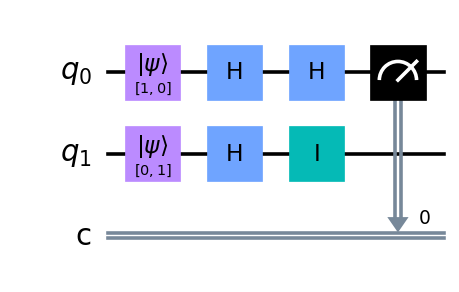

In [12]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [13]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [14]:
# Compile the circuit in the simulator.
compcircuit = qiskit.transpile(circuit, simulator)

In [15]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [16]:
# Get the results.
results = job.result()

In [17]:
# Show the results count.
counts = results.get_counts()

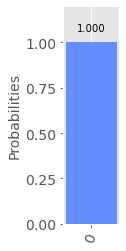

In [18]:
# Display historgram.
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Constant One Function

In [19]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [20]:
# Initialise the first qubit to 0.
circuit.initialize([1, 0], 0)

In [21]:
# Initialise the second qubit to 1.
circuit.initialize([0, 1], 1)

In [22]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [23]:
# X gate.
circuit.x(1)

In [24]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [25]:
# Measure the first qubit.
circuit.measure(0, 0)

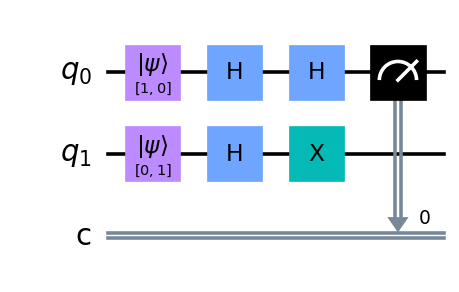

In [26]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [27]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [28]:
# Compile the circuit in the simulator.
compcircuit = qiskit.transpile(circuit, simulator)

In [29]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [30]:
# Get the results.
results = job.result()

In [31]:
# Show the results count.
counts = results.get_counts()

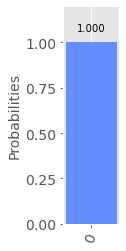

In [32]:
# Display historgram.
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Balanced Function

#### $f(0) = 0, f(1) = 1$

In [33]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [34]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [35]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [36]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [37]:
# CNOT gate.
circuit.cnot(0, 1)

In [38]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [39]:
# Measure the first qubit.
circuit.measure(0, 0)

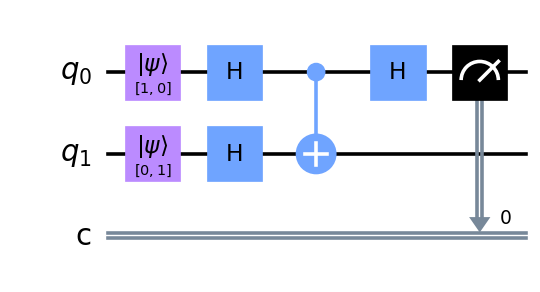

In [40]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [41]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [42]:
# Compile the circuit in the simulator.
compcircuit = qiskit.transpile(circuit, simulator)

In [43]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [44]:
# Get the results.
results = job.result()

In [45]:
# Show the results count.
counts = results.get_counts()

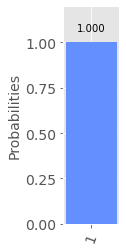

In [46]:
# Display historgram.
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Balanced Function

#### $f(0) = 1, f(1) = 0$

In [47]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [48]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [49]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [50]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [51]:
# CNOT gate.
circuit.cnot(0, 1)

In [52]:
# Apply x to the second qubit.
circuit.x(1)

In [53]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [54]:
# Measure the first qubit.
circuit.measure(0, 0)

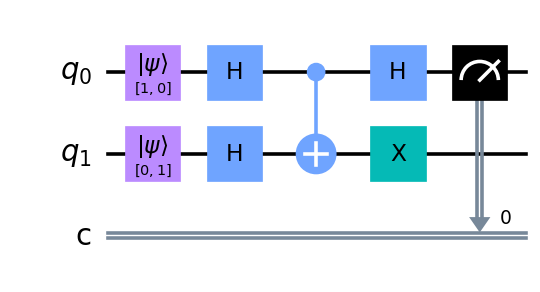

In [55]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [56]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [57]:
# Compile the circuit in the simulator.
compcircuit = qiskit.transpile(circuit, simulator)

In [58]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [59]:
# Get the results.
results = job.result()

In [60]:
# Show the results count.
counts = results.get_counts()

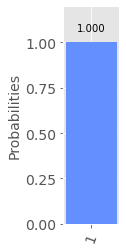

In [61]:
# Display historgram.
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Random Function

<i>The Random Function, selects a random number between 1 and 4, this number is then used to create a function. After some calculations, I determine whether it's a constant or a balanced function.

In [62]:
# Random numbers.
import random

In [63]:
# Return a random (part of) circuit - implementing the quantum oracle for f.
def random_f():
    # Create a circuit with 2 qubits, 1 classical bit.
    circuit = qiskit.QuantumCircuit(2, 1)
    
    # Pick one of the four functions at random.
    f_number = random.randint(1, 4)
    
    # 1: Constant 0 Function. f(0) = f(1) = 0
    # 2: Constant 1 Function. f(0) = f(1) = 1
    # 3: Balanced Identity Function. f(0) = 0, f(1) = 1
    # 4: Balanced Not Function. f(0) = 1, f(1) = 0
    
    if f_number == 1:
        # Apply Identity gate to second qubit.
        circuit.i(1)
    elif f_number == 2:
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    elif f_number == 3:
        # Apply CNOT gate from first to second qubit.
        circuit.cnot(0, 1)
    elif f_number == 4:
        # Apply CNOT gate from first to second qubit.
        circuit.cnot(0, 1)
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    else:
        print("Error!")
        
    # Return the circuit.
    return circuit

#### Create First Part of Circuit

In [64]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [65]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [66]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [67]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [68]:
# Separate parts of circuit.
circuit.barrier()

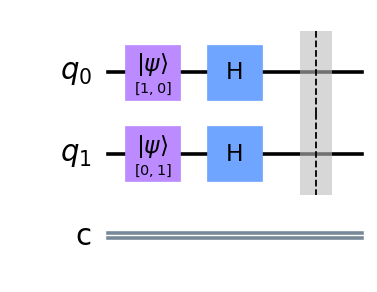

In [69]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

#### Create Second Part of Circuit

In [70]:
# Append the random_f() circuit to circuit
circuit.compose(random_f(), inplace=True)

In [71]:
# Separate parts of circuit.
circuit.barrier()

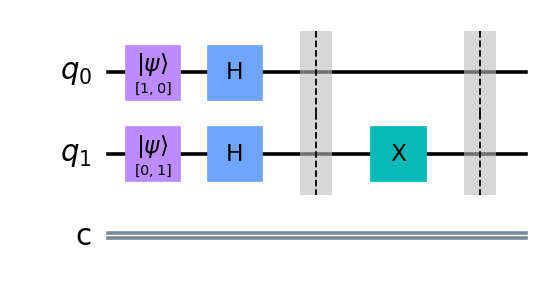

In [72]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

#### Create Third Part of Circuit

In [73]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [74]:
# Measure the first qubit.
circuit.measure(0, 0)

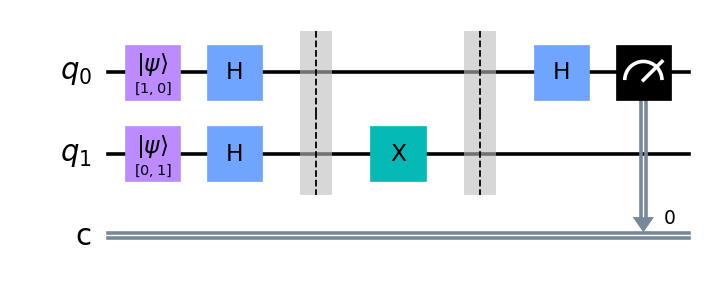

In [75]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

#### Simulate and Decide

In [76]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [77]:
# Compile the circuit in the simulator.
compcircuit = qiskit.transpile(circuit, simulator)

In [78]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [79]:
# Get the results.
results = job.result()

In [80]:
# Show the results count.
counts = results.get_counts()

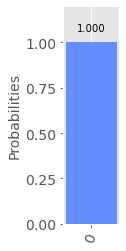

In [81]:
# Display historgram.
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

### Conclusion
<i>After completing this notebook, it is clear to me that there are many advantages to using a quantum computer over a classical computer and vice-versa. The implementation of Deutsch's algorithm with Qiskit really opened my eyes in regards to the efficiency of a quantum computer. Although the example above may not seem too complicated, a classical computer would have had to run the function twice to figure out if the function was <b>constant</b> or <b>balanced</b>. The difference in time would be miniscule in this scenario between a quantum and classical computer, but if the amount of inputs exponentially grew so would the amount of times a classical computer would have to run the function. The same is not true for the quantum computer which will still only need to run the function once no matter how many inputs there are</i>

## References
1. Quantum Computing https://en.wikipedia.org/wiki/Quantum_computing
2. Superposition https://en.wikipedia.org/wiki/Quantum_superposition
3. Entanglement https://en.wikipedia.org/wiki/Quantum_entanglement
4. Quantum vs Classical Computing https://www.cbinsights.com/research/quantum-computing-classical-computing-comparison-infographic/
5. Qubits https://www.quantum-inspire.com/kbase/qubits/
6. Hadamard Gate https://www.quantum-inspire.com/kbase/hadamard/
7. Identity Gate 
3. Deutsch's Algorithm with Qiskit https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

# End

***